# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-09 19:07:50--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.2’

car_data.csv.2      100%[===================>]  57.01K  --.-KB/s    in 0.002s  

2022-11-09 19:07:50 (36.2 MB/s) - ‘car_data.csv.2’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, 1:-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846,)
(549, 18) (549,) (297, 18) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,104,53,101,199,65,11,213,31,24,168,216,667,221,72,12,12,187,198
1,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208
2,97,37,70,173,66,7,151,43,19,129,167,346,119,65,0,16,201,208
3,98,51,84,207,72,7,184,35,21,161,199,520,198,72,9,11,196,199
4,78,43,70,147,65,8,147,46,19,145,169,319,168,77,1,12,181,186
5,93,47,88,200,66,7,173,38,21,151,197,452,205,66,0,3,195,202
6,96,39,64,111,48,8,134,52,18,141,160,258,139,80,7,20,183,184
7,110,58,106,180,51,6,261,26,28,171,278,998,257,83,9,13,181,182
8,88,35,60,143,59,7,128,52,18,129,147,246,109,62,1,6,202,209
9,93,47,85,161,65,12,155,43,19,157,179,354,178,76,2,9,184,196


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.597450,44.921676,82.162113,169.165756,61.810565,8.606557,169.193078,40.859745,20.610200,148.125683,189.061931,441.683060,175.302368,72.642987,6.491803,12.624772,188.723133,195.400729
std,8.338421,6.109946,15.712899,33.677624,8.065912,4.826746,33.336417,7.768573,2.609843,14.430195,31.266569,177.985744,32.343723,7.118397,4.931874,8.906520,6.118346,7.399921
min,77.000000,33.000000,40.000000,105.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,151.000000,68.000000,2.000000,6.000000,184.000000,190.000000
50%,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,178.000000,362.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,200.000000,46.000000,23.000000,159.000000,217.000000,598.000000,199.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,285.000000,1018.000000,268.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
dtypes: int64(18)
memory usage: 77.3 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling features: subtract mean from each feature and divide by sample variation
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled_pd = pd.DataFrame(X_train_scaled)
X_train_scaled_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,7.005123e-16,-1.860483e-17,-4.230577e-16,-3.187088e-16,3.947460e-16,1.100112e-16,-8.089057e-18,2.572320e-16,5.549093e-16,5.492469e-16,3.801857e-16,3.073842e-17,4.068795e-16,-7.247795e-16,-2.588498e-17,4.368091e-17,2.251993e-15,1.407496e-15
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.992294e+00,-1.952971e+00,-2.685727e+00,-1.907031e+00,-1.837867e+00,-1.162620e+00,-1.717198e+00,-1.914547e+00,-1.384563e+00,-2.089588e+00,-1.890703e+00,-1.449094e+00,-2.051799e+00,-1.777720e+00,-1.317496e+00,-1.418768e+00,-2.081402e+00,-1.947840e+00
25%,-7.919325e-01,-8.062533e-01,-7.747268e-01,-8.370972e-01,-5.969507e-01,-3.331484e-01,-6.663379e-01,-1.012659e+00,-6.175347e-01,-7.717033e-01,-6.742390e-01,-6.842910e-01,-7.520634e-01,-6.528466e-01,-9.116007e-01,-7.444899e-01,-7.726665e-01,-7.305016e-01
50%,-7.171559e-02,-1.509860e-01,-2.014267e-01,-9.408749e-02,-1.005843e-01,-1.257805e-01,-3.961167e-01,2.757529e-01,-2.340205e-01,-1.474423e-01,-3.541169e-01,-4.481018e-01,-7.124930e-02,-9.040991e-02,-9.981029e-02,-1.825914e-01,-1.182987e-01,8.105734e-02
75%,7.685375e-01,8.319149e-01,1.008874e+00,7.975241e-01,3.957822e-01,2.889552e-01,9.249650e-01,6.622764e-01,9.165221e-01,7.542680e-01,8.943594e-01,8.790564e-01,7.333492e-01,4.720268e-01,5.090325e-01,6.040664e-01,6.996609e-01,7.573564e-01
max,3.049224e+00,2.306266e+00,1.900674e+00,4.542293e+00,8.834011e+00,9.620509e+00,2.876563e+00,2.594894e+00,3.217607e+00,2.765776e+00,3.071190e+00,3.240948e+00,2.868630e+00,6.518222e+00,3.147351e+00,3.188799e+00,2.826356e+00,2.109955e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
LogRegCV = LogisticRegressionCV(
    cv=5,
    penalty='elasticnet',
    multi_class='multinomial', 
    solver='saga', 
    tol=1e-3, 
    max_iter=500,
    l1_ratios=np.linspace(0, 1, 11)
)

LogRegCV.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=5,
                     l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                     max_iter=500, multi_class='multinomial',
                     penalty='elasticnet', solver='saga', tol=0.001)

In [ ]:
print(f"f1 score: {f1_score(y_test, LogRegCV.predict(X_test_scaled), average='macro')}")
print(f"Accuracy score: {accuracy_score(y_test, LogRegCV.predict(X_test_scaled))}")

f1 score: 0.8011214643377723
Accuracy score: 0.797979797979798


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikitplot.metrics import plot_roc

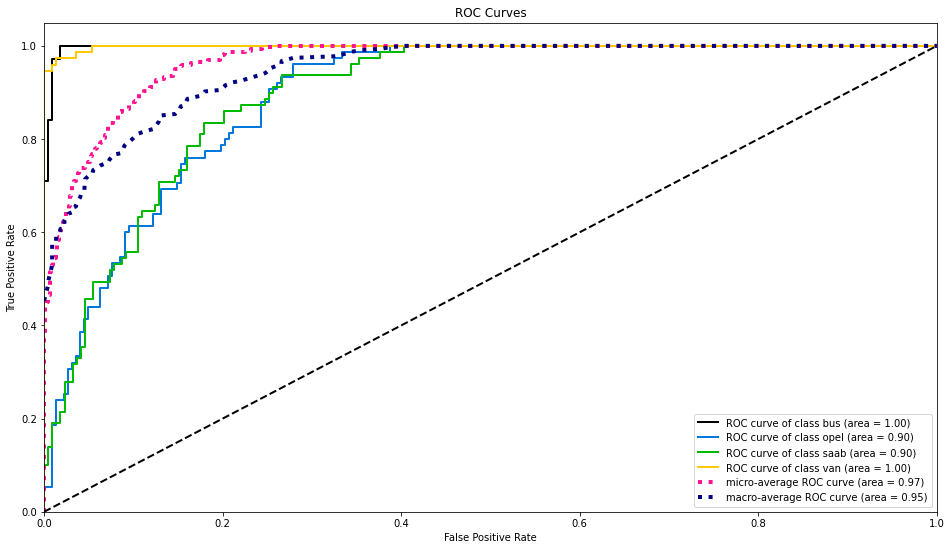

In [ ]:
plot_roc(y_test, LogRegCV.predict_proba(X_test_scaled), figsize = (16, 9))
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explained variance plot. 

In [ ]:
from sklearn.decomposition import PCA

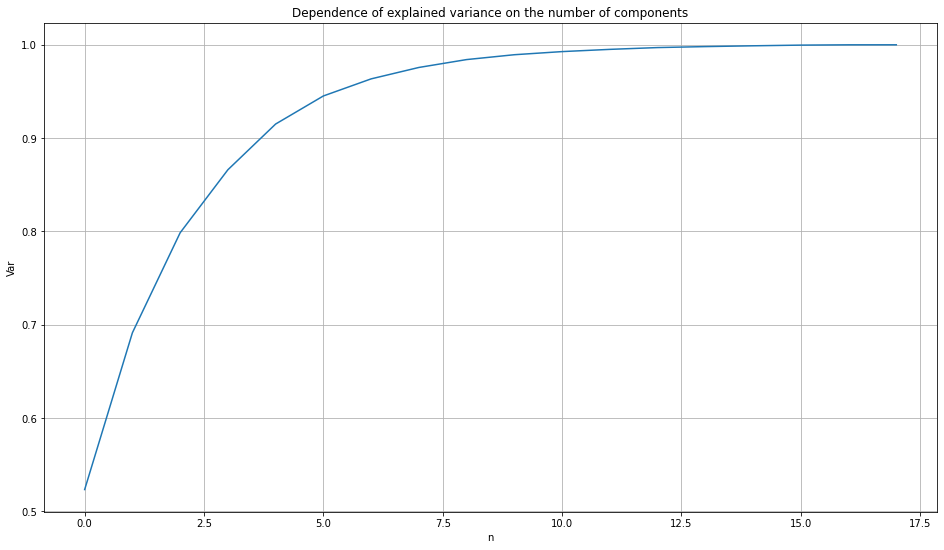

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)
plt.figure(figsize = (16, 9))
plt.plot(np.arange(0, 18), np.cumsum(pca.explained_variance_ratio_))
plt.title("Dependence of explained variance on the number of components")
plt.xlabel('n')
plt.ylabel('Var')
plt.grid()
plt.show()

#### 2.3. PCA transformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
pca = PCA(n_components=12)
pca.fit(X_train_scaled)
X_train_transformed = pca.transform(X_train_scaled)
X_test_transformed = pca.transform(X_test_scaled)

I took 12 components because they explain 99% of the variance and the following components have almost no effect

We should normalize the data, because the variance of the feature that takes larger values will contribute more than those that take smaller values.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=12),
    LogisticRegression(
        penalty='elasticnet',
        multi_class='multinomial', 
        solver='saga', 
        tol=1e-3, 
        max_iter=500,
    )
)
LogRegCV_pca = GridSearchCV(pipe, {"logisticregression__l1_ratio": np.linspace(0, 1, 11)}, cv=5)
LogRegCV_pca.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=12)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500,
                                                           multi_class='multinomial',
                                                           penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.001))]),
             param_grid={'logisticregression__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [ ]:
print(f"f1 score: {f1_score(y_test, LogRegCV_pca.predict(X_test), average='macro')}")
print(f"Accuracy score: {accuracy_score(y_test, LogRegCV_pca.predict(X_test))}")

f1 score: 0.7588719126870247
Accuracy score: 0.7575757575757576


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=12),
    DecisionTreeClassifier()
)
treeCV = GridSearchCV(pipe, {"decisiontreeclassifier__max_depth": np.arange(1, 100)}, cv=5)
treeCV.fit(X_train, y_train)
print(treeCV.best_params_['decisiontreeclassifier__max_depth'])

42


In [ ]:
print(f"f1 score: {f1_score(y_test, treeCV.predict(X_test), average='macro')}")
print(f"Accuracy score: {accuracy_score(y_test, treeCV.predict(X_test))}")

f1 score: 0.6646348291539443
Accuracy score: 0.6632996632996633


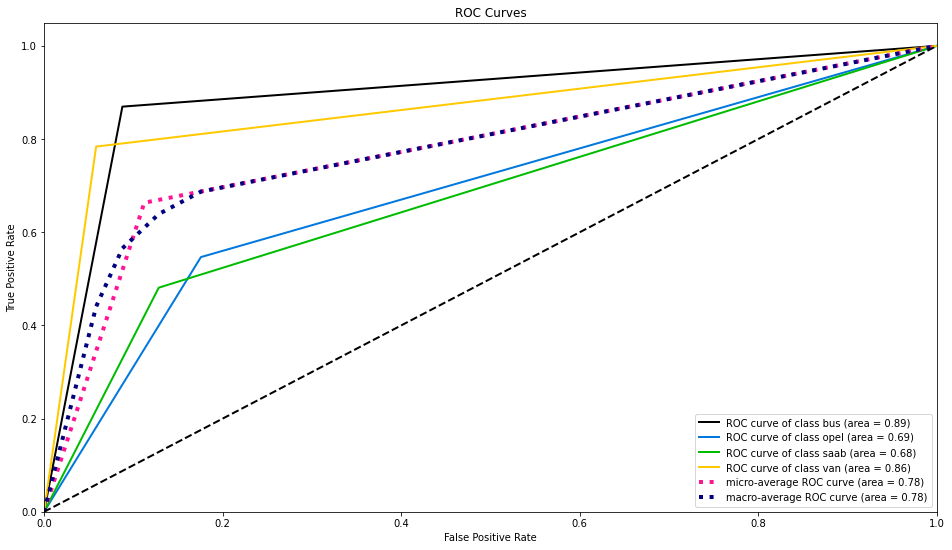

In [ ]:
plot_roc(y_test, treeCV.predict_proba(X_test), figsize = (16, 9))
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensemble varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
LogRegBag = LogRegCV_pca.best_estimator_
TreeBag = treeCV.best_estimator_

accuracy_lr = []
accuracy_dt = []
f1_lr = []
f1_dt = []

clf_lr = BaggingClassifier(LogRegBag, warm_start=True)
clf_dt = BaggingClassifier(TreeBag, warm_start=True)
n_estimators_list = np.arange(2, 100, 5)
for i in n_estimators_list:
    clf_lr.n_estimators = i
    clf_lr.fit(X_train, y_train)
    accuracy_lr.append(accuracy_score(y_test, clf_lr.predict(X_test)))
    f1_lr.append(f1_score(y_test, clf_lr.predict(X_test), average='macro'))

    clf_dt.n_estimators = i
    clf_dt.fit(X_train, y_train)
    accuracy_dt.append(accuracy_score(y_test, clf_dt.predict(X_test)))
    f1_dt.append(f1_score(y_test, clf_dt.predict(X_test), average='macro'))

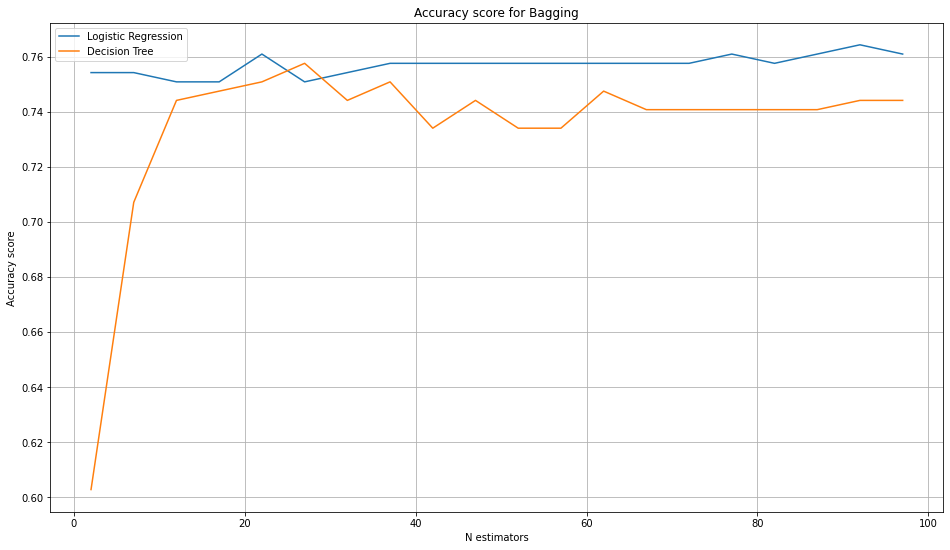

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(n_estimators_list, accuracy_lr, label='Logistic Regression')
plt.plot(n_estimators_list, accuracy_dt, label='Decision Tree')
plt.legend()
plt.title('Accuracy score for Bagging')
plt.xlabel('N estimators')
plt.ylabel('Accuracy score')
plt.grid()
plt.show()

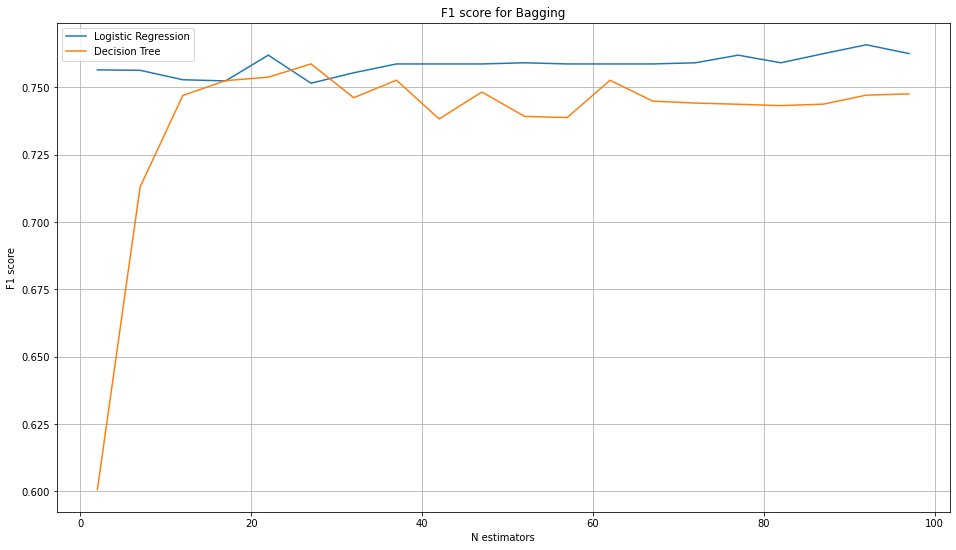

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(n_estimators_list, f1_lr, label='Logistic Regression')
plt.plot(n_estimators_list, f1_dt, label='Decision Tree')
plt.legend()
plt.title('F1 score for Bagging')
plt.xlabel('N estimators')
plt.ylabel('F1 score')
plt.grid()
plt.show()

- Decision tree gives slightly better results than logistic regression, but apparently it depends on the depth of the tree (which can be different on restart and, accordingly, the accuracy and f1 for the decision tree may be less than for regression). 
- After 50-60 estimators in the ensemble, the accuracy and f1 for the decision tree almost stop changing, so probably the optimal number of algorithms lies in this area (up to 10, very fast growth). 
- For logistic regression, increasing the number of estimators in the ensemble practically does not increase the accuracy and f1, i.e. the use of ensembles does not make much sense.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

accuracy_rfc = []
f1_rfc = []

n_estimators_list = np.arange(2, 100, 5)
for i in n_estimators_list:
    pipe_rfc = make_pipeline(
      StandardScaler(),
      PCA(n_components=12),
      RandomForestClassifier(n_estimators=i)
      )
    pipe_rfc.fit(X_train, y_train)
    accuracy_rfc.append(accuracy_score(y_test, pipe_rfc.predict(X_test)))
    f1_rfc.append(f1_score(y_test, pipe_rfc.predict(X_test), average='macro'))


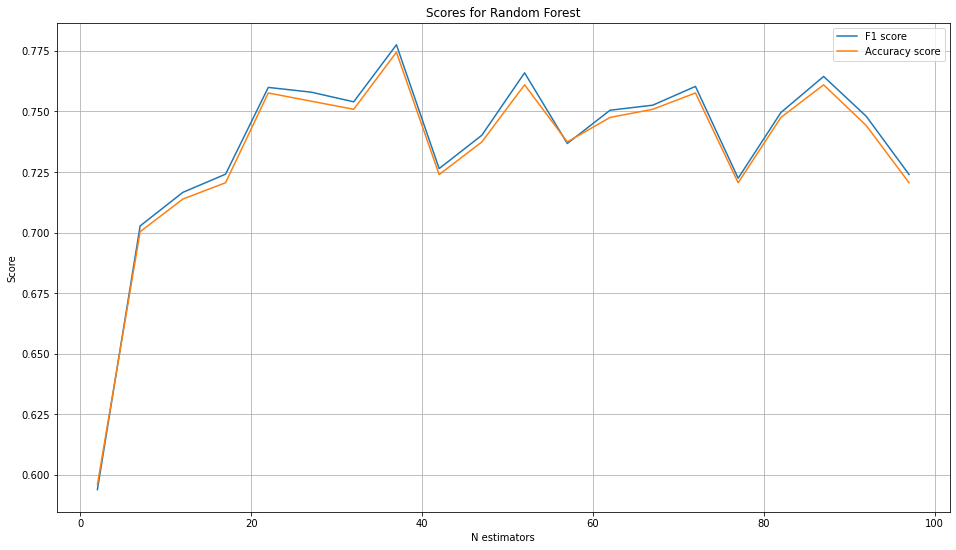

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(n_estimators_list, f1_rfc, label='F1 score')
plt.plot(n_estimators_list, accuracy_rfc, label='Accuracy score')
plt.legend()
plt.title('Scores for Random Forest')
plt.xlabel('N estimators')
plt.ylabel('Score')
plt.grid()
plt.show()

Plot shows that optimal number of trees is about 50-60

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
lrc = LogRegCV_pca.best_estimator_
dtc = treeCV.best_estimator_
rfc = make_pipeline(
    StandardScaler(),
    PCA(n_components=12),
    RandomForestClassifier(n_estimators=55)
    )


In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_lr = []
accuracy_dt = []
accuracy_rf = []
f1_lr = []
f1_dt = []
f1_rf = []

train_indexes = np.array([], dtype=np.int64)
dataset_sizes = []

for t, train_index in skf.split(X_train, y_train):
  train_indexes = np.hstack((train_indexes, train_index))
  dataset_sizes.append(train_indexes.shape[0])
  
  X_train_cur = X_train[train_indexes]
  y_train_cur = y_train[train_indexes]

  lrc.fit(X_train_cur, y_train_cur)
  dtc.fit(X_train_cur, y_train_cur)
  rfc.fit(X_train_cur, y_train_cur)
  
  accuracy_lr.append(accuracy_score(y_test, lrc.predict(X_test)))
  f1_lr.append(f1_score(y_test, lrc.predict(X_test), average='macro'))

  accuracy_dt.append(accuracy_score(y_test, dtc.predict(X_test)))
  f1_dt.append(f1_score(y_test, dtc.predict(X_test), average='macro'))

  accuracy_rf.append(accuracy_score(y_test, rfc.predict(X_test)))
  f1_rf.append(f1_score(y_test, rfc.predict(X_test), average='macro'))

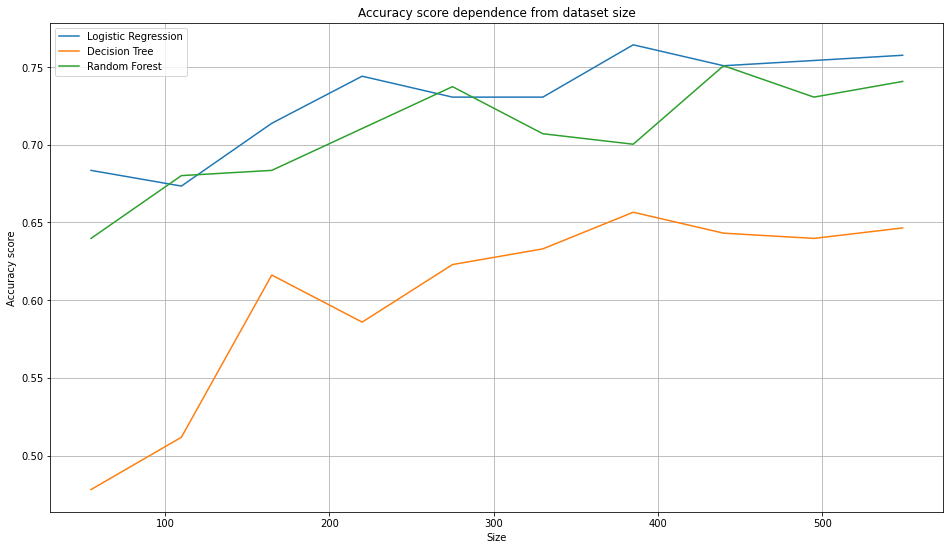

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(dataset_sizes, accuracy_lr, label='Logistic Regression')
plt.plot(dataset_sizes, accuracy_dt, label='Decision Tree')
plt.plot(dataset_sizes, accuracy_rf, label='Random Forest')
plt.legend()
plt.title('Accuracy score dependence from dataset size')
plt.xlabel('Size')
plt.ylabel('Accuracy score')
plt.grid()
plt.show()

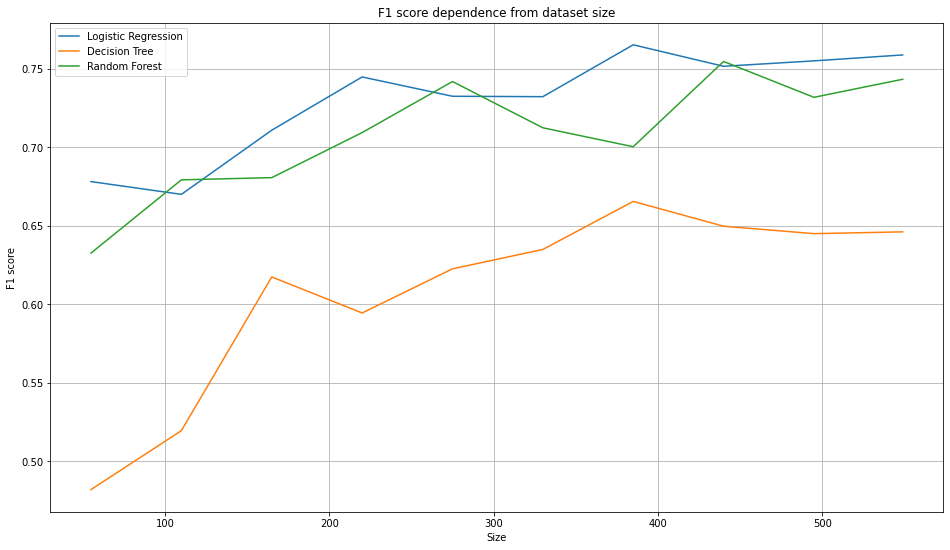

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(dataset_sizes, f1_lr, label='Logistic Regression')
plt.plot(dataset_sizes, f1_dt, label='Decision Tree')
plt.plot(dataset_sizes, f1_rf, label='Random Forest')
plt.legend()
plt.title('F1 score dependence from dataset size')
plt.xlabel('Size')
plt.ylabel('F1 score')
plt.grid()
plt.show()

- Increasing size of the training dataset improves the quality of the model, and this is true for logistic regression, random forest and especially decision tree. 
- Logistic regression and random forest show the best results out of these three models.